# Diagnostics: skill scores

In this diagnostic example we go deeper on the point data diagnostics, and end up with a skill score calculation and ranking! 

### 0. Loading packages

In [1]:
import valenspy as vp
from pathlib import Path
import xarray as xr
from matplotlib import pyplot as plt

## 1. Input
Loading of the different input datasets, just as in the previous notebooks but now more condensed. 

In [39]:
machine = 'hortense' #'tier2_VO_geo' # define the machine name

manager = vp.InputManager(machine=machine) #Create the input manager

# load climate grid data
ds_climate_grid = manager.load_data("CLIMATE_GRID", variables=["tas"], path_identifiers=["latlon_5km"])

# load ERA5 data
ds_ERA5_hourly = manager.load_data("ERA5", variables=["tas"], period=[2018], freq="hourly")


File paths found:
/dodrio/scratch/projects/2022_200/external/climate_grid/regridded/latlon_5km/TEMP_AVG_CLIMATE_GRID_1954_2023_daily_latlon_5km.nc
The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
File paths found:
/dodrio/scratch/projects/2022_200/external/era5/europe/2m_temperature/hourly/era5-hourly-europe-2m_temperature-2018.nc
The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']


## 2. Preprocessing

Preprocessing steps in which we select point timeseries. Here we will use again the point at Sterre campus


In [41]:
# we save the point coordinate in a python dictionary object with their name as key and lon lat as values
point_id = 'sterre' 
point_coord = (3.72, 51.03)

# select the year 2018 for both datasets
ds_climate_grid = ds_climate_grid.sel(time = ds_climate_grid.time.dt.year == 2018 )
ds_ERA5_hourly = ds_ERA5_hourly.sel(time = ds_ERA5_hourly.time.dt.year == 2018 )

# select the point in the original, non regridded CLIMATE_GRID data
ds_climate_grid_point = vp.select_point(ds_climate_grid, point_coord)
ds_climate_grid_point

# select the point in ERA5
ds_ERA5_hourly_point = vp.select_point(ds_ERA5_hourly, point_coord)

# resample hourly values into daily
ds_ERA5_point = ds_ERA5_hourly_point.resample(time='1D').mean().compute() #Resample the data to daily values



## 3. Diagnostics

Time for the fun part, selecting and playing with diagnostics!

### 3.1 Metrics diagnostic object

We will start with the highest level: the diagnostic object. This is the most basic interface to get output from Valenspy

In [48]:
from valenspy.diagnostic import MetricsRankings

MetricsRankings(dt_mod, ds_climate_grid_point.tas)

ImportError: cannot import name 'MetricsRankings' from 'valenspy.diagnostic' (/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc31332_inne/ValEnsPy/src/valenspy/diagnostic/__init__.py)

### 3.2 Breakdown of the metric functions and plotting of ranking

In [ ]:
from valenspy.diagnostic.functions import *
from valenspy.diagnostic.visualizations import *



In [55]:
df_metrics = calc_metrics_da(ds_ERA5_point.tas, ds_climate_grid_point.tas)
df_metrics



{'mean_bias': array(-0.10888293),
 'mean_absolute_error': 0.7738155475960898,
 'mae_90pctl': 0.528822240694069,
 'mae_99pctl': 0.6941664375855225,
 'mae_10pctl': 0.3099086687439012,
 'mae_1pctl': 0.11302401570964093,
 'rmse': 0.9910339767260848,
 'spearman_correlation': 0.9885505018224535,
 'PSS': 1.0}

In [56]:

plot_metric_ranking(df_metrics)

AttributeError: 'dict' object has no attribute 'pivot'

In [57]:
### see scores notebook

In [ ]:
mean_bias

mean_absolute_error

mean_absolute_error( percentile=0.9)

root_mean_square_error

spearman_correlation

### 3.2 Extra: showcasing of point related plotting functions

<Axes: title={'center': 'Near-Surface Air Temperature (tas)'}, xlabel='time', ylabel='Near-Surface Air Temperature\n[K]'>

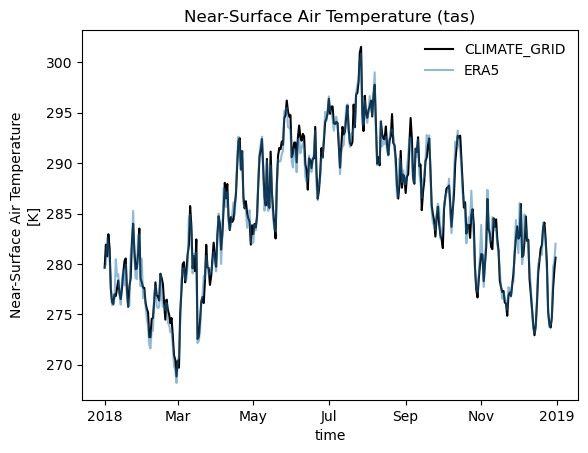

In [45]:
from valenspy.diagnostic.visualizations import *

plot_time_series_mod_ref(ds_ERA5_point.tas, ds_climate_grid_point.tas)



#### Plot the location of points

/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: title={'right': 'Location of points'}>

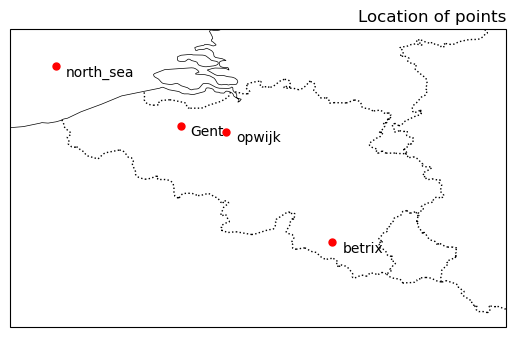

In [33]:
d_point_coords = {
    'Gent'    :  (3.72, 51.03),
    'opwijk'    : (4.18, 50.97), 
    'betrix'    : (5.25, 49.854),
    'north_sea' : (2.465, 51.63),
}


plot_points_on_map(d_point_coords, region='belgium')

/dodrio/scratch/projects/2022_200/project_output/rcs/software/miniconda3/envs/valenspy_dev/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: title={'right': 'Location of points'}>

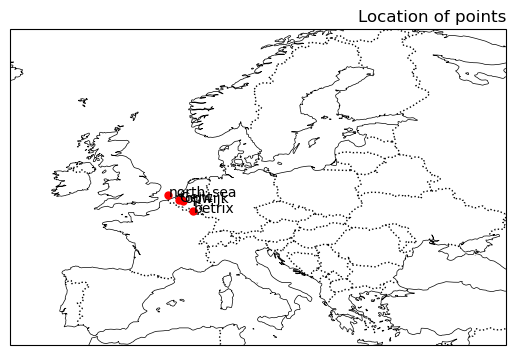

In [35]:
# on a european domain
plot_points_on_map(d_point_coords, region='europe')